In [10]:
#The project with the graphics

import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import deque

class Member:
    def __init__(self, name, age, location, friends=None):
        self.name = name
        self.age = age
        self.location = location
        self.friends = friends if friends else []

#The class for showing the graph
class GraphVisualization:
    def __init__(self, title):
        self.G = nx.Graph()
        self.title = title

    def add_vertex(self, vertex):
        self.G.add_node(vertex)
        
    def add_edge(self, edge):
        self.G.add_edges_from(edge)
    
    def display(self, layout):
        plt.title(self.title)
        pos = layout(self.G)  # Define the layout for the nodes
        nx.draw_networkx_nodes(self.G, pos, node_color='lightblue', node_size=750)  # Draw the nodes
        nx.draw_networkx_edges(self.G, pos, edge_color='gray')  # Draw the edges
        nx.draw_networkx_labels(self.G, pos, font_color='black')  # Draw the node labels
        plt.axis('off')  # Turn off the axis
        plt.show()

class Graph:
    # Map members' names to the Member object
    def __init__(self, title):
        self.members = {} 
        self.visualizer = GraphVisualization(title)
        
    def __str__(self):
        return str([member.name for member in self.members.values()])
    
    def add_member(self, name, age, location):
        # Check if the object with this name exists
        if name not in self.members:
            self.members[name] = Member(name, age, location)
            self.visualizer.add_vertex(name)
        else:
            print("The member already exists")
            
    def add_relationship(self, name1, name2):
        if name1 in self.members and name2 in self.members:
            self.members[name1].friends.append(self.members[name2])
            self.members[name2].friends.append(self.members[name1])
            self.visualizer.add_edge([(name1, name2)])
        else:
            print("The members have not existed.")
            
    def find_friends(self, name):
        if name in self.members:
            return [friend.name for friend in self.members[name].friends]
        else:
            print("The member has not existed. ")
            return []
    
    # Dijkstra's algorithm
    def shortest_path(self, start, end):
        if (start not in self.members or
            end not in self.members):
            return -1

        visited = set()
        pq = [(0, start)]  # Push tuple of (weight, member_name)

        while pq:
            w, member_name = heapq.heappop(pq)  
            if member_name == end:
                return w

            visited.add(member_name)
            member = self.members[member_name]

            for friend in member.friends:
                if friend.name not in visited:
                    heapq.heappush(pq, (w + 1, friend.name)) # Push tuple

        return -1
    
    def shortest_path_dfs(self, start, end):
        if (start not in self.members or
            end not in self.members):
            return -1
        
        visited = set()
        
        def dfs(member_name):
            if member_name == end:
                return len(visited)
            
            visited.add(member_name)

            mn = float('inf')
            for friend in self.members[member_name].friends:
                if friend.name not in visited:
                    mn = min(mn, dfs(friend.name))
                
            visited.remove(member_name)
            
            return mn
        
        return dfs(start)
        
    def find_k_new_friends(self, member, k):
        if member not in self.members:
            return []
        
        q = deque([friend.name for friend in self.members[member].friends])
        visited = set([member])
        new_friends = []
        
        while q:
            for i in range(len(q)):
                if len(new_friends) == k:
                    return new_friends
                
                member_name = q.popleft()
                visited.add(member_name)
                
                for friend in self.members[member_name].friends:
                    if friend.name not in visited:
                        new_friends.append(friend.name)
                        q.append(friend.name)
                        
        return new_friends

    def display_graph(self, layout=nx.spring_layout):
        self.visualizer.display(layout)

Artem's friends: ['Tom', 'Kevin']
The shortest path length from Artem to Alexander is:, 2 (Dijkstra's), 2 (Brute force)
Find 3 new friends for Alexander: ['Artem', 'Femi', 'Ruslan']


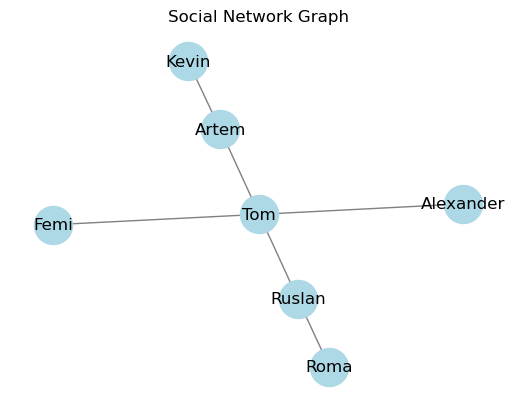

In [11]:
graph = Graph("Social Network Graph")

# Adding members
graph.add_member("Artem", 17, "Bluebell")
graph.add_member("Tom", 17, "Bluebell")
graph.add_member("Kevin", 18, "Rootes")
graph.add_member("Femi", 18, "n/a")
graph.add_member("Ruslan", 18, "Sherbourne")
graph.add_member("Roma", 20, "Whitefields")
graph.add_member("Alexander", 17, "Bluebell")

# Adding relationships
relationships = [
    ("Artem", "Tom"),
    ("Artem", "Kevin"),
    ("Tom", "Femi"),
    ("Tom", "Ruslan"),
    #("Kevin", "Roma"),
    #("Femi", "Alexander")
    ("Tom", "Alexander"),
    ("Ruslan", "Roma")
]

for name1, name2 in relationships:
    graph.add_relationship(name1, name2)

#Find friends 
print("Artem's friends:", graph.find_friends("Artem"))

#Shortest path:
start = "Artem"
end = "Alexander"
shortest_path_length = graph.shortest_path(start, end)
shortest_path_length_dfs = graph.shortest_path_dfs(start, end)
if shortest_path_length != -1:
    print(f"The shortest path length from {start} to {end} is:, {shortest_path_length} (Dijkstra's), {shortest_path_length_dfs} (Brute force)")
else:
    print(f"No path found from {start} to {end}.") 

# Find k new friends
k = 3
new_friends = graph.find_k_new_friends('Alexander', k=k)
print(f'Find {k} new friends for Alexander: {new_friends}')

# Displaying graph
graph.display_graph()